In [8]:
%matplotlib inline
import time
import pylab
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.neighbors import kneighbors_graph
import cPickle as pickle
pylab.rcParams['figure.figsize'] = (20.0, 10.0)

In [9]:
np.random.seed(0)

X = pickle.load(open('ica_matrix.p', 'rb'))
# connectivity matrix for structured Ward
connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)

# create clustering estimators

kmeans = cluster.MiniBatchKMeans(n_clusters=6)
ward = cluster.AgglomerativeClustering(n_clusters=6, linkage='ward',
                                       connectivity=connectivity)
dbscan = cluster.DBSCAN(eps=.2)

clustering_names = ['MiniBatchKMeans', 'AgglomerativeClustering', 'DBSCAN']
clustering_algorithms = [kmeans, ward, dbscan]

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


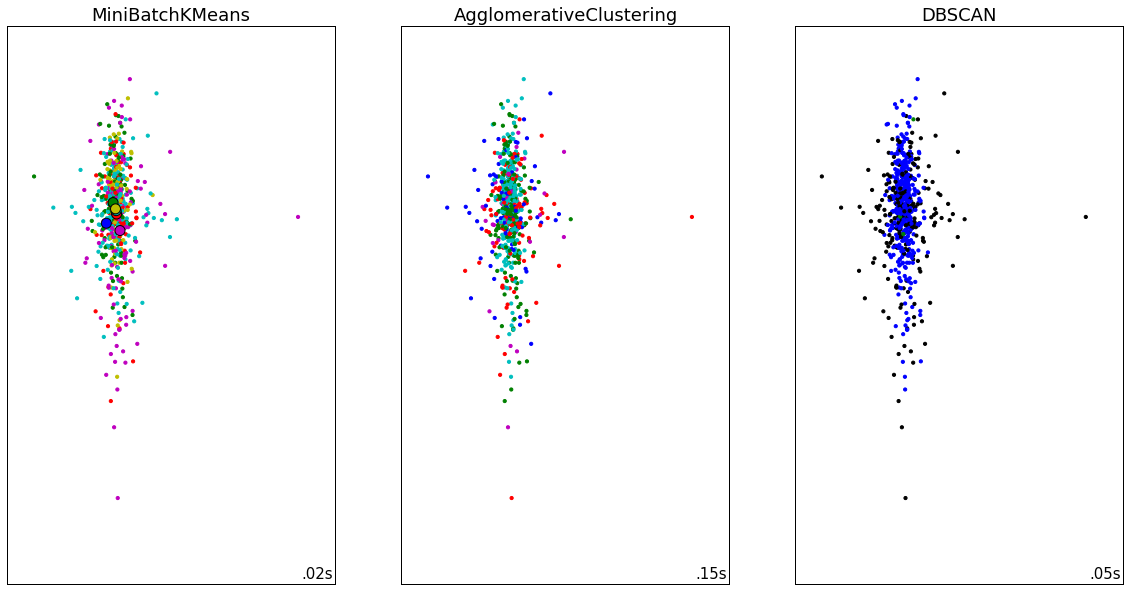

In [10]:
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)
plot_num = 1
for name, algorithm in zip(clustering_names, clustering_algorithms):
    # predict cluster memberships
    t0 = time.time()
    algorithm.fit(X)
    t1 = time.time()
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(X)

    # plot
    plt.subplot(1, len(clustering_algorithms), plot_num)
    plt.title(name, size=18)
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)

    if hasattr(algorithm, 'cluster_centers_'):
        centers = algorithm.cluster_centers_
        center_colors = colors[:len(centers)]
        plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
#    plt.xlim(-2, 2)
#    plt.ylim(-2, 2)
    plt.xticks(())
    plt.yticks(())
    plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
             transform=plt.gca().transAxes, size=15,
             horizontalalignment='right')
    plot_num += 1

plt.show()